Main Python code to perform the simulation and display results

In [35]:
import numpy as np
from matplotlib import pyplot as plt, colors as mcolors
from scipy.integrate import solve_ivp
from scipy.constants import G, au
from sklearn.preprocessing import MinMaxScaler

from ctypes import c_void_p, c_double, c_int, CDLL
from numpy.ctypeslib import ndpointer

import cffi

In [2]:
massfactor = 10**24 # [kg]
scalefactor = 100  # [au]
velocityfactor = 100  # []
accuracy = 0.3

Generate random body system:

In [3]:
count = 100

In [4]:
def massGen():
    for _ in range(count):
        yield abs(np.random.randn())*massfactor

def positionGen():
    for _ in range(count):
        yield np.random.randn(2)*scalefactor*au

def velocityGen():
    for _ in range(count):
        yield np.random.randn(2)*velocityfactor

In [5]:
bodies = zip(masses := np.array([[_ for _ in massGen()]]), positions := np.array([_ for _ in positionGen()]))

In [6]:
velocities = np.array([_ for _ in velocityGen()])

Show data:

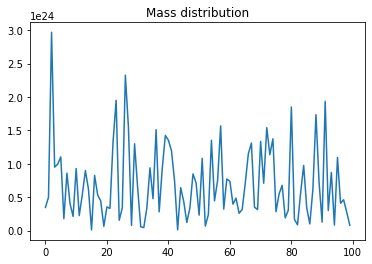

In [7]:
plt.title('Mass distribution')
plt.plot(masses.flatten())

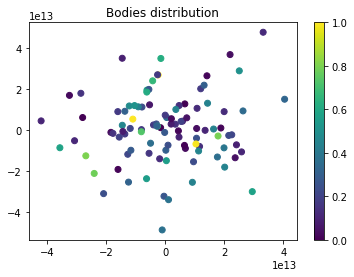

In [8]:
mass_scaler = MinMaxScaler()
cmap = mass_scaler.fit_transform(masses.reshape(-2, 2))
c = mcolors.ColorConverter().to_rgb

plt.title('Bodies distribution')
plt.scatter(positions[:, 0], positions[:, 1], c=cmap)
plt.colorbar()

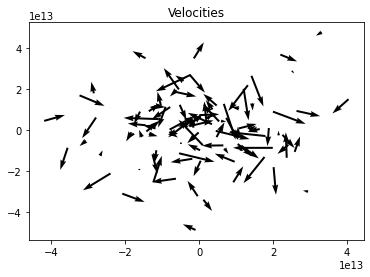

In [9]:
plt.title('Velocities')
plt.quiver(positions[:,0], positions[:,1], velocities[:,0], velocities[:,1])

Construct Python function from C shared library:

In [37]:
"""elements = cdll.LoadLibrary("./Elements/elements.so")
base = CDLL("./Elements/barnes-hut.so", handle)
#lib = cdll.LoadLibrary("./Elements/barneshut.so")
#computeForces = lib.perform(ndpointer(dtype=c_double, shape=(count,2))(body_list),  )
base.getForces.argtypes = [ndpointer(dtype=c_double, shape=(count, 3)), c_int, c_double, c_double]
computeForces.restype = ndpointer(dtype=c_double,
                          shape=(count,2))"""

'elements = cdll.LoadLibrary("./Elements/elements.so")\nbase = CDLL("./Elements/barnes-hut.so", handle)\n#lib = cdll.LoadLibrary("./Elements/barneshut.so")\n#computeForces = lib.perform(ndpointer(dtype=c_double, shape=(count,2))(body_list),  )\nbase.getForces.argtypes = [ndpointer(dtype=c_double, shape=(count, 3)), c_int, c_double, c_double]\ncomputeForces.restype = ndpointer(dtype=c_double,\n                          shape=(count,2))'

Compute forces using C function:

In [ ]:
state = np.concatenate((masses.T, positions), axis=1)
state

In [ ]:
radius = max(abs(positions.flatten()))
radius

In [ ]:
#forces = computeForces(c_void_p(state.ctypes.data),c_int(count),c_double(accuracy), c_double(radius))

In [ ]:
np.ctypeslib.ndpointer?
